# The Sparks Foundation

## Domain - Data Science and Business Analytics
## Batch - November 2021
### Author - Deep Ranjan Guha


      Copyright  Deep Ranjan Guha,2021

#### Task 2 - Prediction using Unsupervised ML.
#### Dataset - https://bit.ly/3kXTdox

In [1]:
# Importing the required libraries:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

#### Reading the dataset:

In [10]:
# Load the iris dataset
iris_data=sns.load_dataset('iris')
iris_data.head(10) # See the first 10 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [11]:
iris_data.info() # Checking the info
print('\n','Shape : ',iris_data.shape)  # Checking the shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

 Shape :  (150, 5)


* The no of records : 150
* The no of attributes : 5

In [12]:
iris_data.describe().T  # Checking the 5 point summary

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


* The distribution of the data is near normal as the mean and median values of all the attributes lie close to each other.

#### Numerical and Categorical Features:

In [20]:
data_num=iris_data.select_dtypes(np.number)
data_cat=iris_data.select_dtypes(object)
print('The numerical features : ')
print(data_num.columns,'\n')
print('The categorical features : ')
print(data_cat.columns)

The numerical features : 
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object') 

The categorical features : 
Index(['species'], dtype='object')


#### Pairplot Visualisation:

<Figure size 864x648 with 0 Axes>

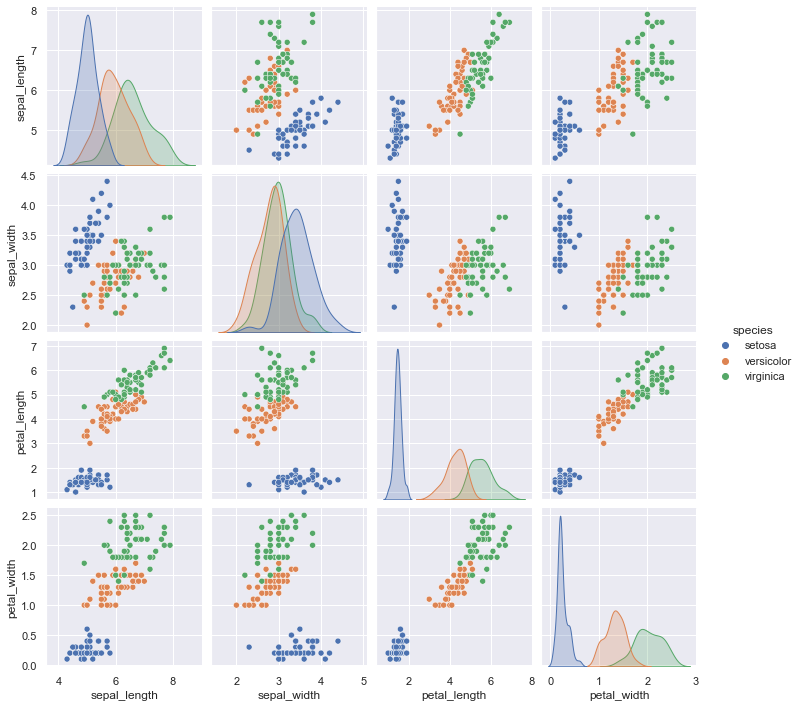

In [15]:
plt.figure(figsize=(12,9))
sns.set_theme(style='darkgrid')
sns.pairplot(iris_data,hue='species',diag_kind='kde')
plt.show()

* 3 distinct clusters can be observed from the above plot.
* A linear relationship can be observed among the independent attributes.

#### Checking the Null/Missing Values:

In [16]:
count=iris_data.isna().sum()
percent=((count/iris_data.shape[0])*100)
null=pd.DataFrame(pd.concat([count,percent],keys=['Missing values','% Missing values'],axis=1))
null

,Missing values,% Missing values
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


* There are no missing records observed in the dataset.

#### Checking The Symmetry:

In [18]:
skew=iris_data.skew()
skew

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

* The features have a near normal distribution.

#### Visualisation of Spread and Distribution of data:

Spread of data : 


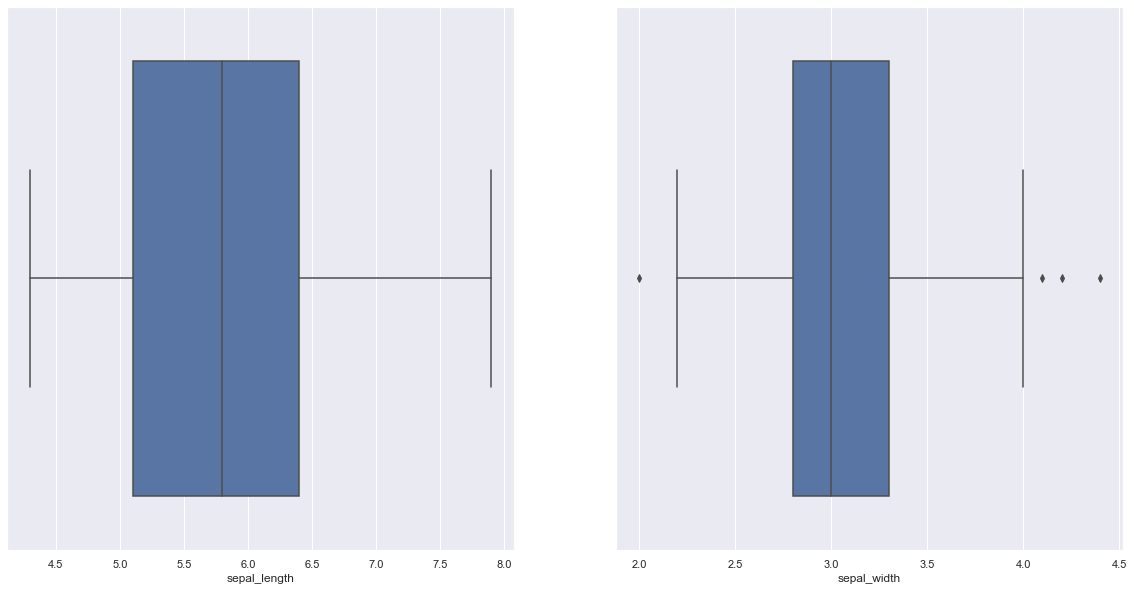

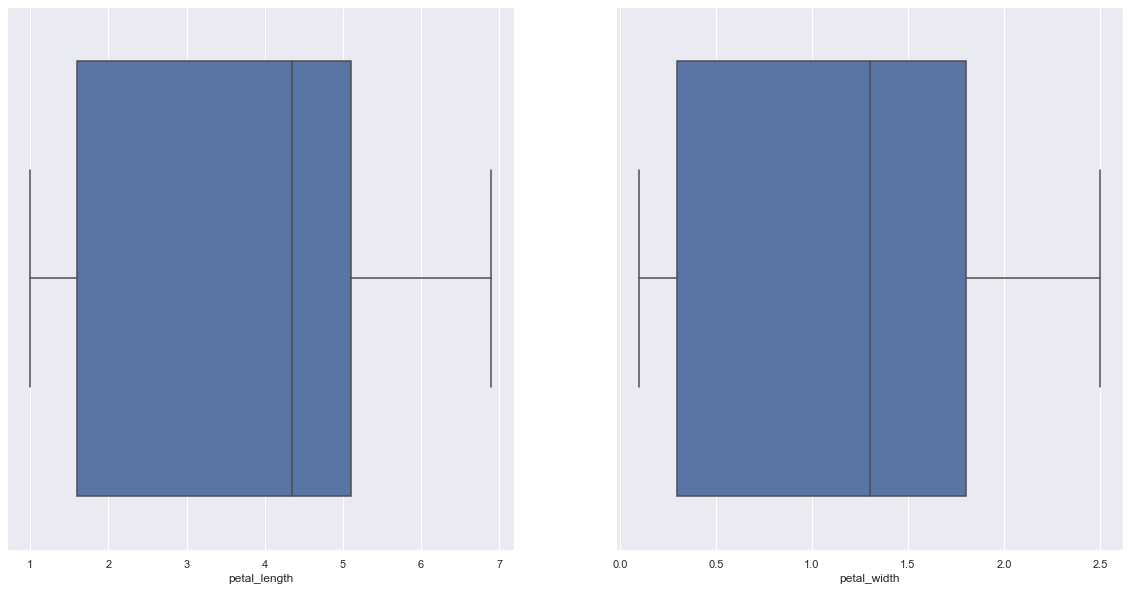



Distribution of data : 


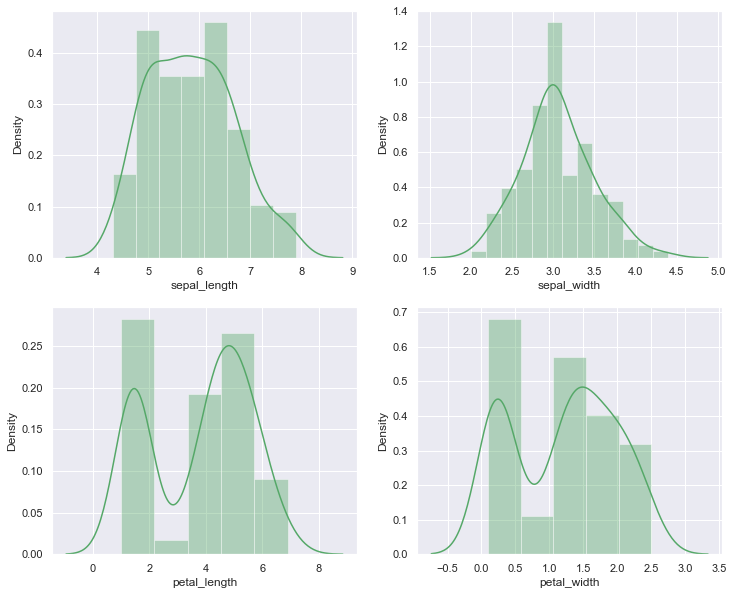

In [25]:
plt.rcParams['figure.figsize']=(20,10)
print('Spread of data : ')
fig,axes=plt.subplots(1,2)
sns.boxplot(x=iris_data['sepal_length'],ax=axes[0])
sns.boxplot(x=iris_data['sepal_width'],ax=axes[1])
plt.show()
fig,axes=plt.subplots(1,2)
sns.boxplot(x=iris_data['petal_length'],ax=axes[0])
sns.boxplot(x=iris_data['petal_width'],ax=axes[1])
plt.show()
print('\n')
print('Distribution of data : ')
j=1
plt.figure(figsize=(12,10))
for i in data_num:
    plt.subplot(2,2,j)
    sns.distplot(iris_data[i],color='g')
    j+=1
plt.show()

* The distribution of the data signifies a near normal distribution.
* No significant effect of outliers is observed from the distribution plots.

#### Checking the Correlation matrix and presence of Multicollinearity:

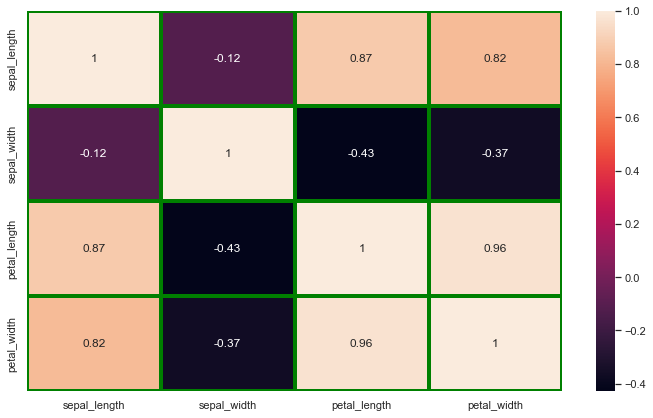

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(data=iris_data.corr(),annot=True,linecolor='green',linewidth=3.5)
plt.show()

#### Bivariate Analysis:

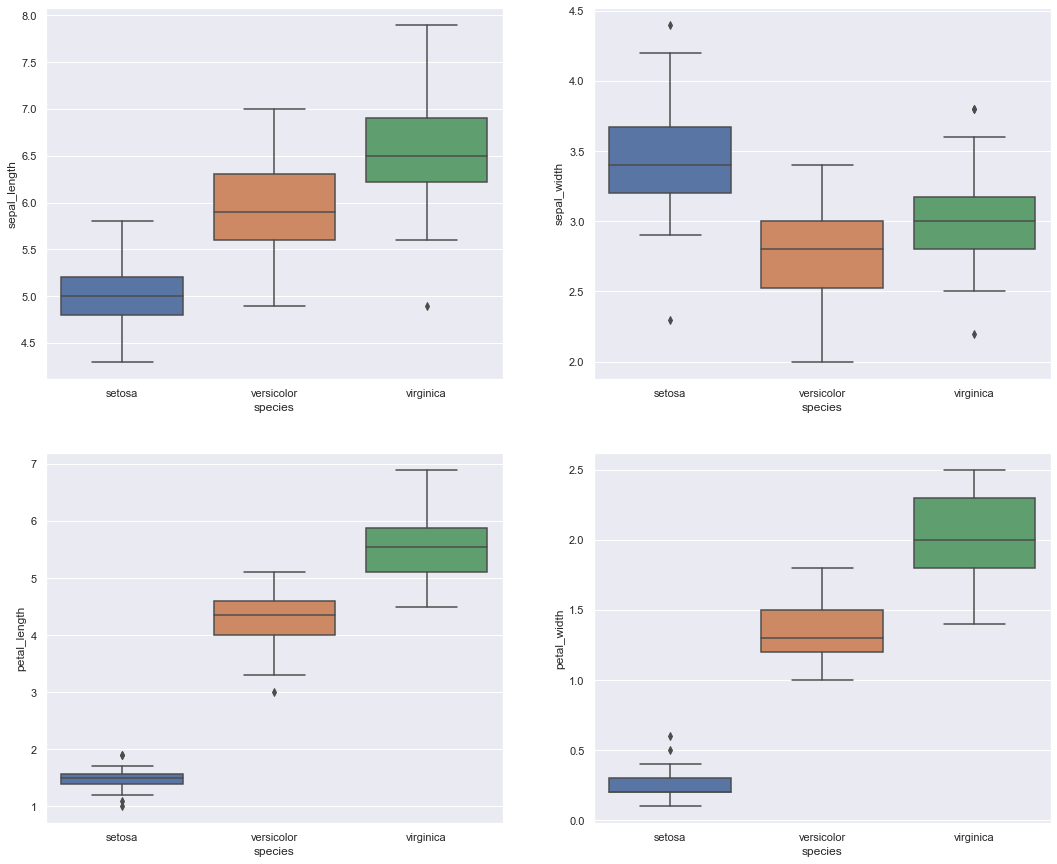

In [31]:
plt.figure(figsize=(18,15))
j=1
for column in data_num:
    plt.subplot(2,2,j)
    sns.boxplot(x=iris_data['species'],y=iris_data[column],data=iris_data)
    j+=1
plt.show()   

#### Data Scaling and Preparation:

In [33]:
df=iris_data.drop('species',axis=1) # dropping the label
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
# Standard Scaling the dataset
SS=StandardScaler()
df_sc=pd.DataFrame(data=SS.fit_transform(df),columns=df.columns)
df_sc.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


#### Findind the optimal number of clusters using Elbow plot method.

   No of clusters      Errors
0               1  600.000000
1               2  222.361705
2               3  139.820496
3               4  114.092547
4               5   90.916229
5               6   81.624661
6               7   70.658640
7               8   62.899040
8               9   54.241074


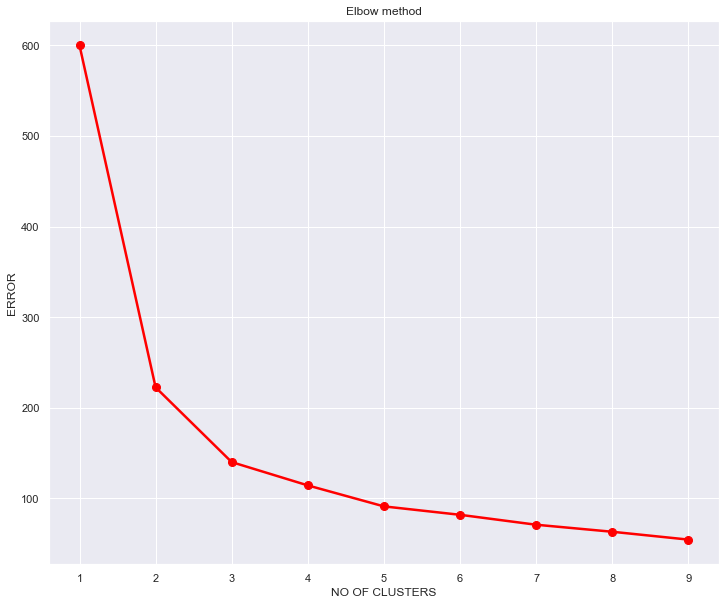

In [46]:
# Calculating the inertia
k=range(1,10)
error=[]

for cluster in k:
    kmeans=KMeans(n_clusters=cluster)
    kmeans.fit(df_sc)
    err=kmeans.inertia_
    error.append(err)
data=pd.DataFrame({'No of clusters':k,'Errors':error})
print(data.sort_values(by='Errors',ascending=False))

# Visulisation of Elbow plot:
plt.rcParams['figure.figsize']=(12,10)
plt.plot(range(1,10),error,marker='o',color='red',linewidth=2.5,markersize=8)
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('ERROR')
plt.title('Elbow method')
plt.show()

It can be clearly seen from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we can choose the number of clusters as 3.

#### Cross checking the optimal value using Silhouette score:

In [50]:
# Calculating the silhouette_score:
for clusters in range(2,10):
    model  = KMeans(clusters)
    model.fit(df_sc)
    sil_score = silhouette_score(df_sc,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.5817500491982808
silhouette_score for 3 clusters: 0.45994823920518646
silhouette_score for 4 clusters: 0.38822009621659864
silhouette_score for 5 clusters: 0.34272673292290584
silhouette_score for 6 clusters: 0.32390926323293934
silhouette_score for 7 clusters: 0.34215819834106354
silhouette_score for 8 clusters: 0.33726518840126885
silhouette_score for 9 clusters: 0.32864956443475163


* From the silhouette scores I will be considering 3 clusters as the optimal no of clusters.

#### Fitting the Kmeans Clustering algorithm with 3 clusters 

In [84]:
# Applying K Means algorithm:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_sc)
df_k = df_sc.copy()
df_k['lables_k'] = kmeans.labels_
print('Cluster centers : ',kmeans.cluster_centers_,'\n')
print('Cluster labels : ',kmeans.labels_)
df_k.head(10)

Cluster centers :  [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]] 

Cluster labels :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


,sepal_length,sepal_width,petal_length,petal_width,lables_k
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1
5,-0.537178,1.939791,-1.169714,-1.052180,1
6,-1.506521,0.788808,-1.340227,-1.183812,1
7,-1.021849,0.788808,-1.283389,-1.315444,1
8,-1.748856,-0.362176,-1.340227,-1.315444,1
9,-1.143017,0.098217,-1.283389,-1.447076,1


In [85]:
# Checking the proportion of datapoints:
df_k['lables_k'].value_counts()

0    53
1    50
2    47
Name: lables_k, dtype: int64

#### Visulaisation and comparison of clusters.

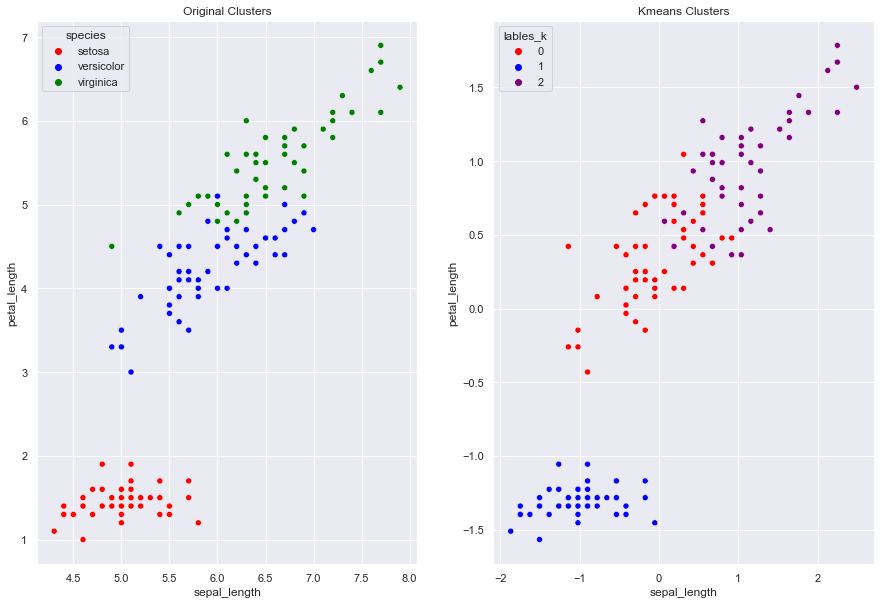

In [91]:
plt.rcParams['figure.figsize'] = (15,10)
plt.subplot(1,2,1)
plt.title('Original Clusters')
sns.scatterplot(x='sepal_length',y='petal_length',hue='species',data=iris_data,
                palette=['red','blue','green'])
plt.subplot(1,2,2)
plt.title('Kmeans Clusters')
sns.scatterplot(x='sepal_length',y='petal_length',hue='lables_k',data=df_k,
                palette=['red','blue','purple'])
plt.show()

* 3 distinct clusters can be observed in both the above plots.
* Kmeans has done a good job in distinguishing the clusters but some overlapping datapoints can be observed.